In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
import os
import umap.umap_ as umap
os.chdir("..")

/Users/kristophernolte/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00',
          '#000000', '#FFA500', '#800080', '#A52A2A', '#FFC0CB',
          '#00FF00', '#000080', '#800000', '#808000', '#008080',
          '#FFD700', '#DC143C', '#4B0082', '#40E0D0', '#FA8072', '#7FFF00']

l_new = [
    '$\\bf{Taxon\ Label}$',
    '$\\it{Ae. aegypti}$',
    '$\\it{Ae. albopictus}$',
    '$\\it{Ae. annulipes}$-group',
    '$\\it{Ae. caspius}$',
    '$\\it{Ae. cataphylla}$',
    '$\\it{Ae. cinereus-geminus\\ }$pair',
    '$\\it{An. claviger-petragnani\\ }$pair',
    '$\\it{Ae. communis-punctor\\ }$pair',
    '$\\it{Ae. japonicus}$',
    '$\\it{Ae. koreicus}$',
    '$\\it{An. maculipennis}$ s.l.',
    '$\\it{Cx. modestus}$',
    '$\\it{Cs. morsitans-fumipennis\\ }$pair',
    'other',
    '$\\it{Cx. torrentium-pipiens\\ }$s.l. pair',
    '$\\it{Cq. richiardii}$',
    '$\\it{Ae. rusticus}$',
    '$\\it{An. stephensi}$',
    '$\\it{Ae. sticticus}$',
    '$\\it{Ae. vexans}$',
    '$\\it{Cx. vishnui}$-group',
    '$\\bf{Genus}$',
    '$\\it{Aedes}$',
    '$\\it{Anopheles}$',
    '$\\it{Culex}$',
    '$\\it{Culiseta}$',
    '$\\it{Coquillettidia}$',
    '$\\it{Armigeres}$',
    '$\\it{Toxorhynchites}$'
]

device_map_list = ['Leica-M205c', 'Olympus SZ61 + Olympus DP23', 'macrolens + iPhone SE',]

In [ ]:
# Load the data, use fold 2 as its the highest performing
FOLD = 2
test_df = pd.read_pickle("classifier/results/final_models/test_df_{}.pkl".format(FOLD))
fmaps = np.load("classifier/umap/data/feature_maps_{}.npy".format(FOLD))[:,:,0].squeeze()

In [ ]:
# Create UMAP embedding
test_df["Image ID"] = [x.split(os.sep)[-1].split(".")[0].split("_")[-1] for x in test_df["PATH"].values]
df_ref = pd.read_pickle("utils/references/database_reference_MLREADY.pkl")
df_merged = pd.merge(test_df, df_ref, on="Image ID", how="inner")

embedding = umap.UMAP(n_neighbors=10, min_dist=.75).fit_transform(fmaps)

df_merged["UMAP-y"] = embedding[:,0]
df_merged["UMAP-x"] = embedding[:,1]

df_merged = df_merged.sort_values(by="LABEL", ascending=True)
df_merged["Device"] = df_merged["Device"].str.replace('leica m205c + leica k/3c', "Leica M205c")
#df_merged.to_pickle("classifier/umap/results/umap_prediction.pkl")

/var/folders/zq/vkd6f9tx4gdctwbs4b3j895w0000gn/T/ipykernel_85516/1017586443.py:7: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sb.scatterplot(df_merged, x="UMAP-x", y="UMAP-y", hue="Device", ax=ax[1],


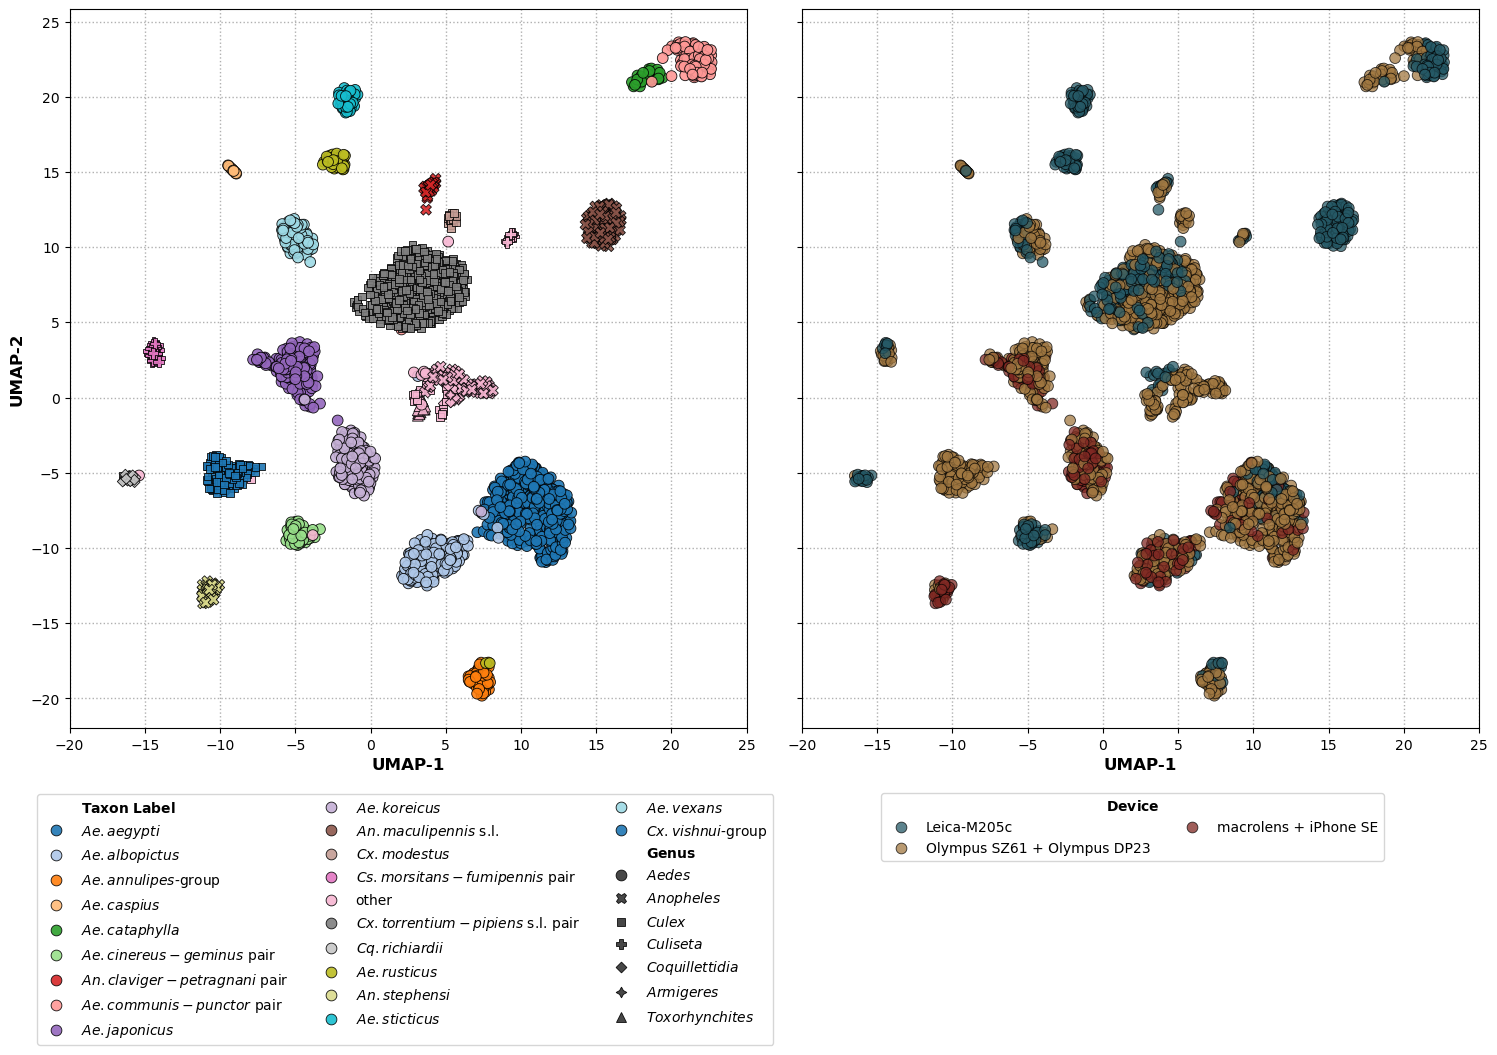

In [4]:
# Load the created UMAP embedding
df_merged = pd.read_pickle("classifier/umap/results/umap_prediction.pkl")
fig, ax = plt.subplots(1,2, figsize=(16,10), sharex=True, sharey=True, width_ratios=[1,1], height_ratios=[1])

sb.scatterplot(df_merged, x="UMAP-x", y="UMAP-y", hue="LABEL", ax=ax[0],
               edgecolor="black", palette="tab20", s=60, alpha=.9, legend=True, style="2. Taxonomic Level")
sb.scatterplot(df_merged, x="UMAP-x", y="UMAP-y", hue="Device", ax=ax[1],
               edgecolor="black", palette=[ "#265A67", "#A27942", "#802823"], s=60, alpha=0.75, legend=True)

colors = ["white", "#802823", "#A27942", "#265A67"]
for a in ax:
    a.grid(True, linestyle='dotted', linewidth=1)
    a.set_axisbelow(True)
    a.set_aspect(1)
    a.set_xticks(np.arange(-20, 26, 5))
    a.set_yticks(np.arange(-20, 26, 5))
    a.set_xlabel("UMAP-1", fontsize=12, fontweight="bold")
    a.set_ylabel("UMAP-2", fontsize=12, fontweight="bold")

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles, labels=l_new, loc= "lower right", bbox_to_anchor=(1.05, -.45), title="", ncol=3,  frameon=True)

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles=handles, labels=device_map_list, loc= "lower right", bbox_to_anchor=(.87, -.194), title='$\\bf{Device}$', ncol=2,  frameon=True)

plt.tight_layout()
#plt.savefig("figures/UMAP.png", dpi=300, bbox_inches='tight')